In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
sns.set()

In [12]:
data = pd.read_csv('1.04.+Real-life+example.csv')
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [13]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [14]:
## Since True = the data point is missing, while False = the data point is not missing, we can sum them
data.isnull().sum() 

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [17]:
# Drop all missing values
data_zero_mv = data.dropna(axis=0)

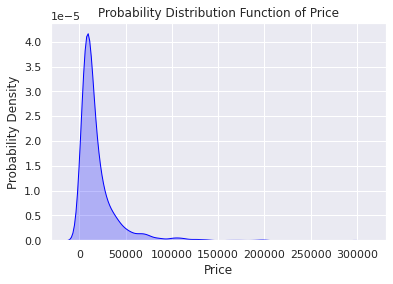

In [18]:
## Ploting the the probability distribution function (PDF) of a variable
sns.kdeplot(data_zero_mv['Price'], shade=True, color='blue')
plt.xlabel('Price')
plt.ylabel('Probability Density')
plt.title('Probability Distribution Function of Price')
plt.show()

In [19]:
## There are some outliers present 
## q is a variable that will be equal to the 99th percentile of the 'Price' variable
q = data_zero_mv['Price'].quantile(0.99)

In [22]:
## In this way we removed the top 1% of the data about 'Price' 
data2 = data_zero_mv[data_zero_mv['Price'] < q]

In [23]:
data2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000,3984
unique,7,NaN,6,NaN,NaN,4,2,NaN,302
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN,188
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922,NaN
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000,NaN
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


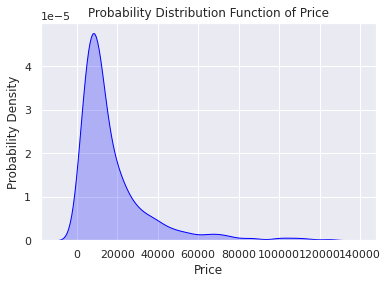

In [25]:
## With checking the PDF, we could see there are much fewer outliers
sns.kdeplot(data2['Price'], shade=True, color='blue')
plt.xlabel('Price')
plt.ylabel('Probability Density')
plt.title('Probability Distribution Function of Price')
plt.show()

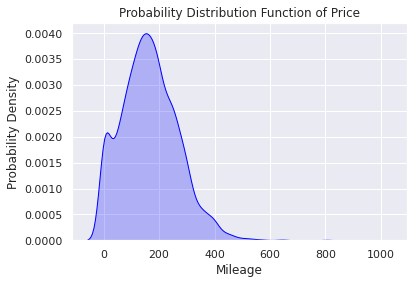

In [26]:
## Same for another feature
sns.kdeplot(data2['Mileage'], shade=True, color= 'blue')
plt.xlabel('Mileage')
plt.ylabel('Probability Density')
plt.title('Probability Distribution Function of Price')
plt.show()

In [27]:
q = data2['Mileage'].quantile(0.99)
data3 = data2[data2['Mileage'] < q]

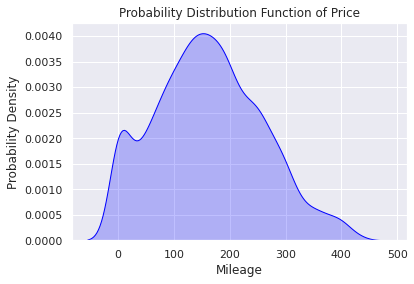

In [28]:
sns.kdeplot(data3['Mileage'], shade=True, color= 'blue')
plt.xlabel('Mileage')
plt.ylabel('Probability Density')
plt.title('Probability Distribution Function of Price')
plt.show()

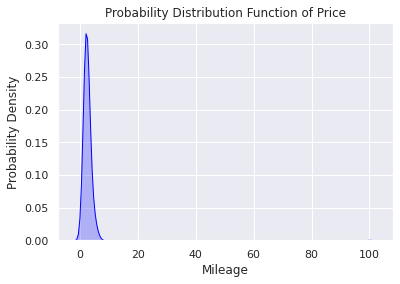

In [29]:
## Also for EngineV
sns.kdeplot(data3['EngineV'], shade=True, color= 'blue')
plt.xlabel('Mileage')
plt.ylabel('Probability Density')
plt.title('Probability Distribution Function of Price')
plt.show()

In [30]:
data4 = data3[data3['EngineV'] < 6.5]

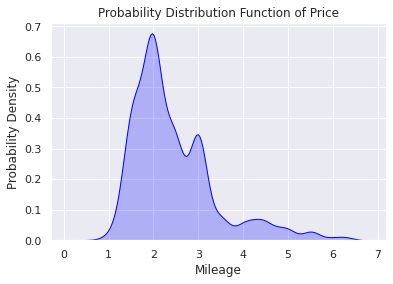

In [31]:
sns.kdeplot(data4['EngineV'], shade=True, color= 'blue')
plt.xlabel('Mileage')
plt.ylabel('Probability Density')
plt.title('Probability Distribution Function of Price')
plt.show()

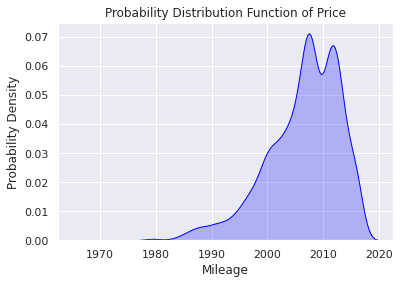

In [33]:
## For the Year the outliers are on the low end
sns.kdeplot(data4['Year'], shade=True, color= 'blue')
plt.xlabel('Mileage')
plt.ylabel('Probability Density')
plt.title('Probability Distribution Function of Price')
plt.show()

In [34]:
q = data4['Year'].quantile(0.01)
data5 = data4[data4['Year'] > q]

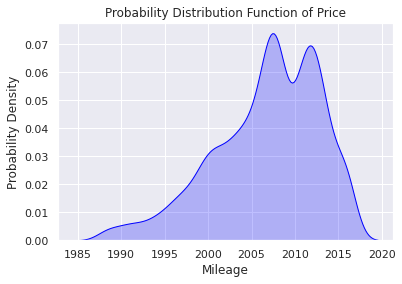

In [151]:
sns.kdeplot(data5['Year'], shade=True, color= 'blue')
plt.xlabel('Mileage')
plt.ylabel('Probability Density')
plt.title('Probability Distribution Function of Price')
plt.show()

In [35]:
## Removing the remain indexes
data_cleaned = data5.reset_index(drop=True)

In [36]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,NaN
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


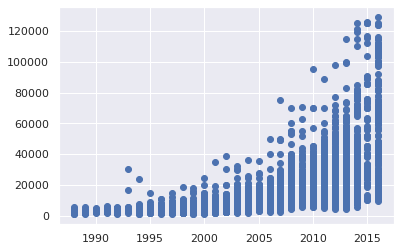

In [154]:
plt.scatter(data_cleaned['Year'], data_cleaned['Price'])
plt.show()

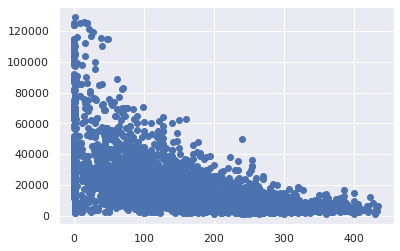

In [155]:
plt.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
plt.show()

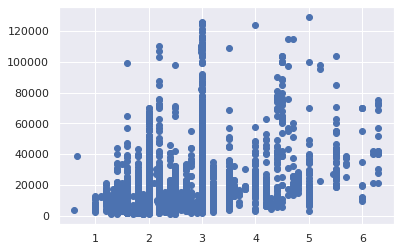

In [156]:
plt.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
plt.show()

In [37]:
## Since 'Price' is exponentially distributed it could be shown in log transformation
log_price = np.log(data_cleaned['Price'])
data_cleaned['Log_Price']=log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Log_Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557


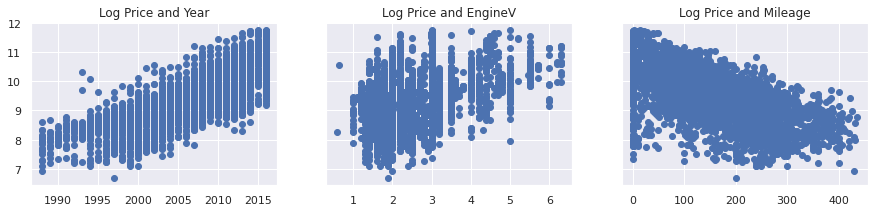

In [38]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Log_Price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Log_Price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Log_Price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [159]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

In [160]:
data_cleaned.describe(include='all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Log_Price
count,3867,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867,3867.000000
unique,7,6,NaN,NaN,4,2,NaN,291,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN,E-Class,NaN
freq,848,1467,NaN,NaN,1807,3505,NaN,181,NaN
mean,NaN,NaN,160.542539,2.450440,NaN,NaN,2006.709853,NaN,9.415703
std,NaN,NaN,95.633291,0.949366,NaN,NaN,6.103870,NaN,0.876616
min,NaN,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN,6.684612
25%,NaN,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN,8.881836
50%,NaN,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN,9.367344
75%,NaN,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN,9.985068


In [43]:
## Checking the multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
## we make use of the variance_inflation_factor
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [44]:
# Since Year has the highest VIF, I will remove it from the model
data_no_multicollinearity = data_cleaned.drop(['Year'], axis = 1)

In [45]:
# To include the categorical data in the regression, let's create dummies
data_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [46]:
data_dummies.describe(include='all')

,Price,Mileage,EngineV,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
count,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,...,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,9.415703,0.161365,0.195242,0.078097,0.111715,0.128782,0.219291,...,0.039824,0.002845,0.002845,0.028446,0.001810,0.009568,0.000776,0.003620,0.000259,0.001293
std,19085.855165,95.633291,0.949366,0.876616,0.367915,0.396438,0.268358,0.315056,0.335002,0.413820,...,0.195571,0.053266,0.053266,0.166264,0.042513,0.097360,0.027846,0.060068,0.016081,0.035940
min,800.000000,0.000000,0.600000,6.684612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7200.000000,91.000000,1.800000,8.881836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11700.000000,157.000000,2.200000,9.367344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21700.000000,225.000000,3.000000,9.985068,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,129222.000000,435.000000,6.300000,11.769287,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [196]:
data_dummies.head()

,Mileage,EngineV,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,8.342840,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.9,8.974618,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.0,9.495519,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.2,10.043249,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.0,9.814656,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
## Inputs and targets
targets = data_dummies['Log_Price']
inputs = data_dummies.drop(['Log_Price'],axis=1)

In [52]:
## Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [59]:
# Scale the features and store them in a new variable
inputs_scaled = scaler.transform(inputs)

In [60]:
## Train-Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [61]:
## Create linear regression object and fit the model
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [62]:
## Check the outputs of the regression
y_hat = reg.predict(x_train)

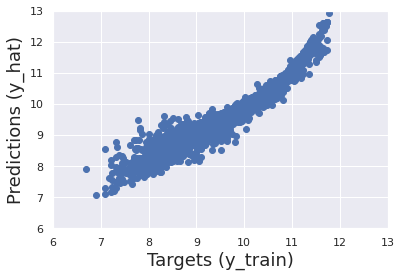

In [63]:
## The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

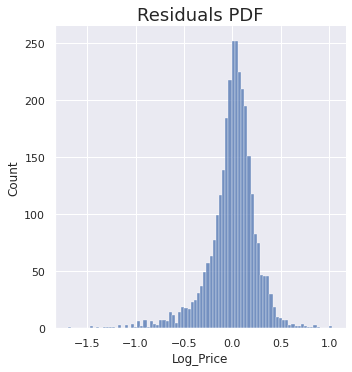

In [64]:
## Plot the PDF of the residuals and check for anomalies
sns.displot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [65]:
# Find the R-squared of the model
reg.score(x_train,y_train)

0.9155884735807736

In [66]:
x_train.shape

(3093, 308)

In [67]:
y_train.shape

(3093,)

In [68]:
## Find the Adjusted R-squared
r2 = reg.score(x_train,y_train)
n = x_train.shape[0]
p = x_train.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.9062498420660028

In [70]:
# Obtain the bias 
reg.intercept_

10461719846.919468

In [71]:
## Obtain the weights
reg.coef_

array([ 5.30428772e-01, -1.54562119e-01,  7.61022482e-02,  1.63406097e+12,
        1.76074214e+12, -2.51164973e+11,  1.74355328e+12,  1.20256014e+10,
        1.12404041e+12, -1.92953071e-02,  1.15748484e-02,  4.31005481e-03,
       -3.51691586e-03,  9.25783126e-03, -3.45829951e-02, -1.11894082e-02,
       -4.03585429e-02,  2.37028134e-01,  2.76115798e+11, -7.53246386e+11,
        2.84225608e-02,  3.02382710e-02, -9.64540509e-03, -2.48470711e+10,
       -8.02503153e-04,  2.12633029e-03,  2.77038987e-03,  1.85429189e-02,
        3.26350454e-04, -1.75718052e+10, -6.24390045e-04, -9.01542418e-03,
        1.02518742e-02,  3.58428955e-02,  7.60955811e-02,  5.17475179e+12,
        1.64756775e-02,  2.20260620e-02,  3.35235596e-02, -2.20063442e+12,
        1.21459961e-02,  1.81732178e-02, -2.65432492e+12,  1.86462402e-02,
        2.24304199e-02,  1.03027344e-01,  3.23486328e-02, -1.40288791e+11,
        3.77807617e-02,  3.73764038e-02,  7.02819824e-02,  4.37660217e-02,
        7.01904297e-03,  

In [201]:
## Compairing 
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-3.610379e-01
1,EngineV,2.590036e-02
2,Brand_BMW,7.449520e+11
3,Brand_Mercedes-Benz,8.027047e+11
4,Brand_Mitsubishi,2.045417e+11
...,...,...
302,Model_X6,1.653290e-01
303,Model_X6 M,5.570221e-02
304,Model_Yaris,-6.723526e+10
305,Model_Z3,2.612305e-02


In [72]:
## Testing the model
y_hat_test = reg.predict(x_test)

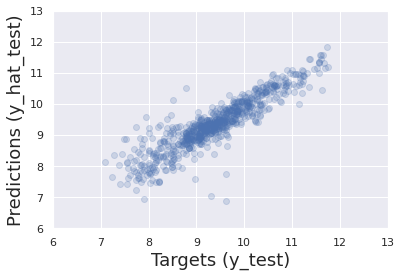

In [203]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [73]:
## Check these predictions
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

/home/aida/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


,Prediction
0,8097.429223
1,0.000000
2,3028.005201
3,6668.899372
4,9986.792083


In [75]:
## We can also include the test targets in that data frame
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,8097.429223,NaN
1,0.000000,7900.0
2,3028.005201,NaN
3,6668.899372,NaN
4,9986.792083,NaN
...,...,...
769,31398.849144,6950.0
770,9120.313249,NaN
771,15080.051886,NaN
772,78360.660497,NaN


In [76]:
## Again droping the indexes
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: Log_Price, dtype: float64

In [77]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,8097.429223,2300.0
1,0.000000,2800.0
2,3028.005201,2500.0
3,6668.899372,6400.0
4,9986.792083,9150.0
...,...,...
769,31398.849144,29500.0
770,9120.313249,9600.0
771,15080.051886,18300.0
772,78360.660497,68500.0
